# Criteo Attribution Modeling for Bidding (EDA on data subset)

## 1. Overview data
Columns of the data subset:

| Column name | Description |
| --- | ----------- |
| timestamp | Timestamp of the impression (starting from 0 for the first impression). The dataset is sorted according to timestamp.|
| uid | Unique user identifier|
| campaign | Unique identifier for the campaign|
| conversion 1 | If there was a conversion in the 30 days after the impression (independently of whether this impression was last click or not)|
| conversion_timestamp | The timestamp of the conversion or -1 if no conversion was observed conversion_id a unique identifier for each conversion (so that timelines can be reconstructed if needed). -1 if there was no conversion |
| attribution 1 | If the conversion was attributed to Criteo, 0 otherwise |
| click 1 | If the impression was clicked, 0 otherwise |
| click_nb | Number of clicks. More than 1 if there was several clicks before a conversion |
| time_since_last_click | The time since the last click (in s) for the given impression |

In [5]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')

In [7]:
# read in csv file and display first 5 rows of the datset
df_subset = pd.read_csv("c:/Users/Maria/Desktop/ds_projects/attribution/data/processed/pcb_subset.csv")
df_subset.head()

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,time_since_last_click
0,48,26687310,17132183,0,-1,-1,0,0,-1,-1,-1
1,608,8481710,15574227,0,-1,-1,0,0,-1,-1,-1
2,853,7735001,2946551,0,-1,-1,0,0,-1,-1,440896
3,1491,17411066,13422843,0,-1,-1,0,0,-1,-1,354970
4,1536,11558551,19602309,0,-1,-1,0,0,-1,-1,-1


In [ ]:
df_subset['uid'].value_counts()

uid
4386726     74
20316259    67
23396493    57
25599512    53
31304763    52
            ..
913880       1
18381510     1
19232820     1
7505052      1
22735876     1
Name: count, Length: 10000, dtype: int64

In [14]:
df_subset['uid'].value_counts()

uid
4386726     74
20316259    67
23396493    57
25599512    53
31304763    52
            ..
913880       1
18381510     1
19232820     1
7505052      1
22735876     1
Name: count, Length: 10000, dtype: int64

In [15]:
chain_lengths.value_counts().sort_index()

count
1     5211
2     1972
3      956
4      528
5      333
6      234
7      177
8      128
9       89
10      74
11      49
12      44
13      34
14      33
15      17
16      16
17       9
18      12
19       9
20       3
21       7
22       4
23       6
24       5
25       5
26       7
27       2
28       4
29       3
30       1
31       3
32       1
33       3
34       3
36       2
37       2
40       2
42       1
43       1
44       1
47       1
49       1
50       2
52       1
53       1
57       1
67       1
74       1
Name: count, dtype: int64

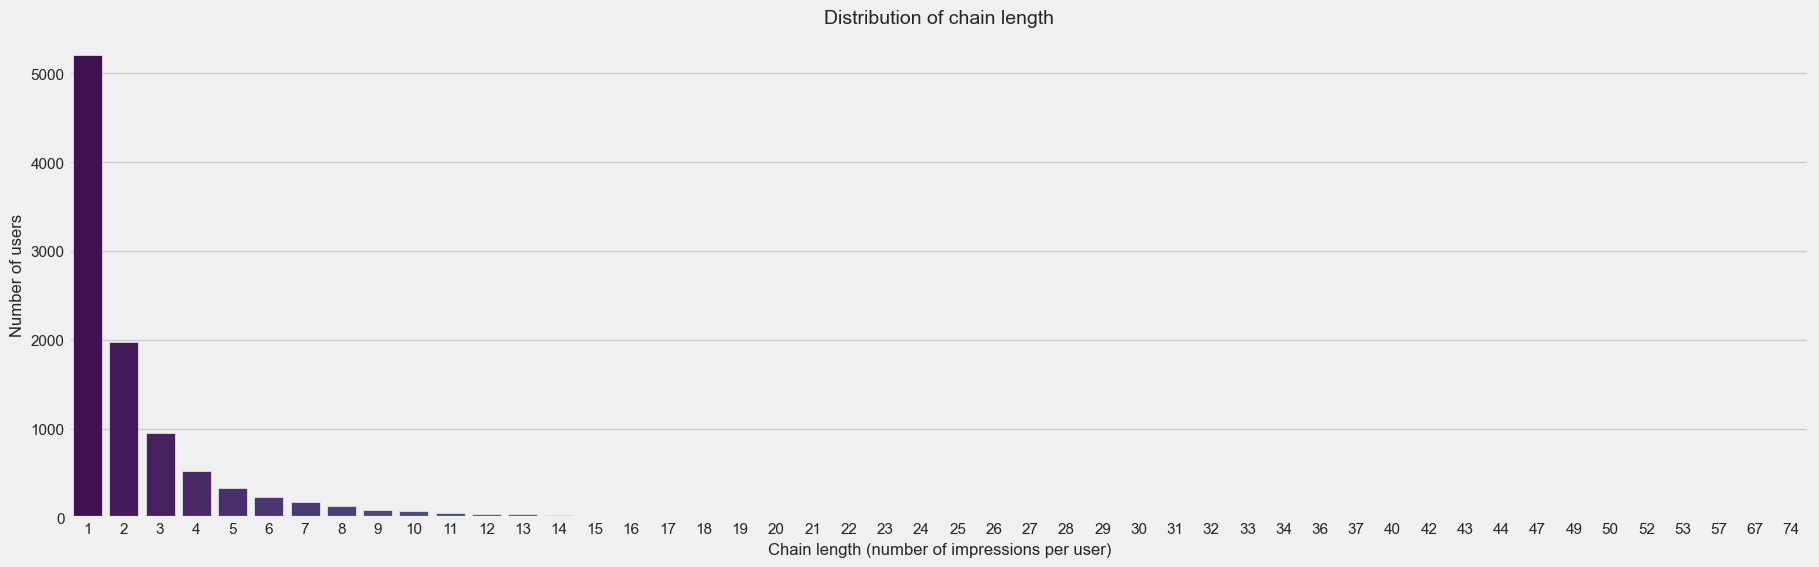

In [17]:
chain_lengths = df_subset['uid'].value_counts()
length_distribution = chain_lengths.value_counts().sort_index()

plt.figure(figsize=(20,6))
sns.barplot(x = length_distribution.index, y = length_distribution.values, palette="viridis")

plt.title("Distribution of chain length", fontsize = 14)
plt.xlabel("Chain length (number of impressions per user)", fontsize = 12)
plt.ylabel("Number of users", fontsize = 12)

plt.show()

## Initial Hypotheses / Assumptions about the dataset

In [ ]:
# selected_cols = ['campaign', 'conversion', 'attribution', 'click', 'click_pos', 'click_nb', 'time_since_last_click']
# corr_matrix = df_subset[selected_cols].corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(df, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
# plt.title('Korrelationsmatrix')
# plt.show()

## Explore and clean the data

Let's look at the distribution with the help of histograms. This might take some time to run, please be patient.

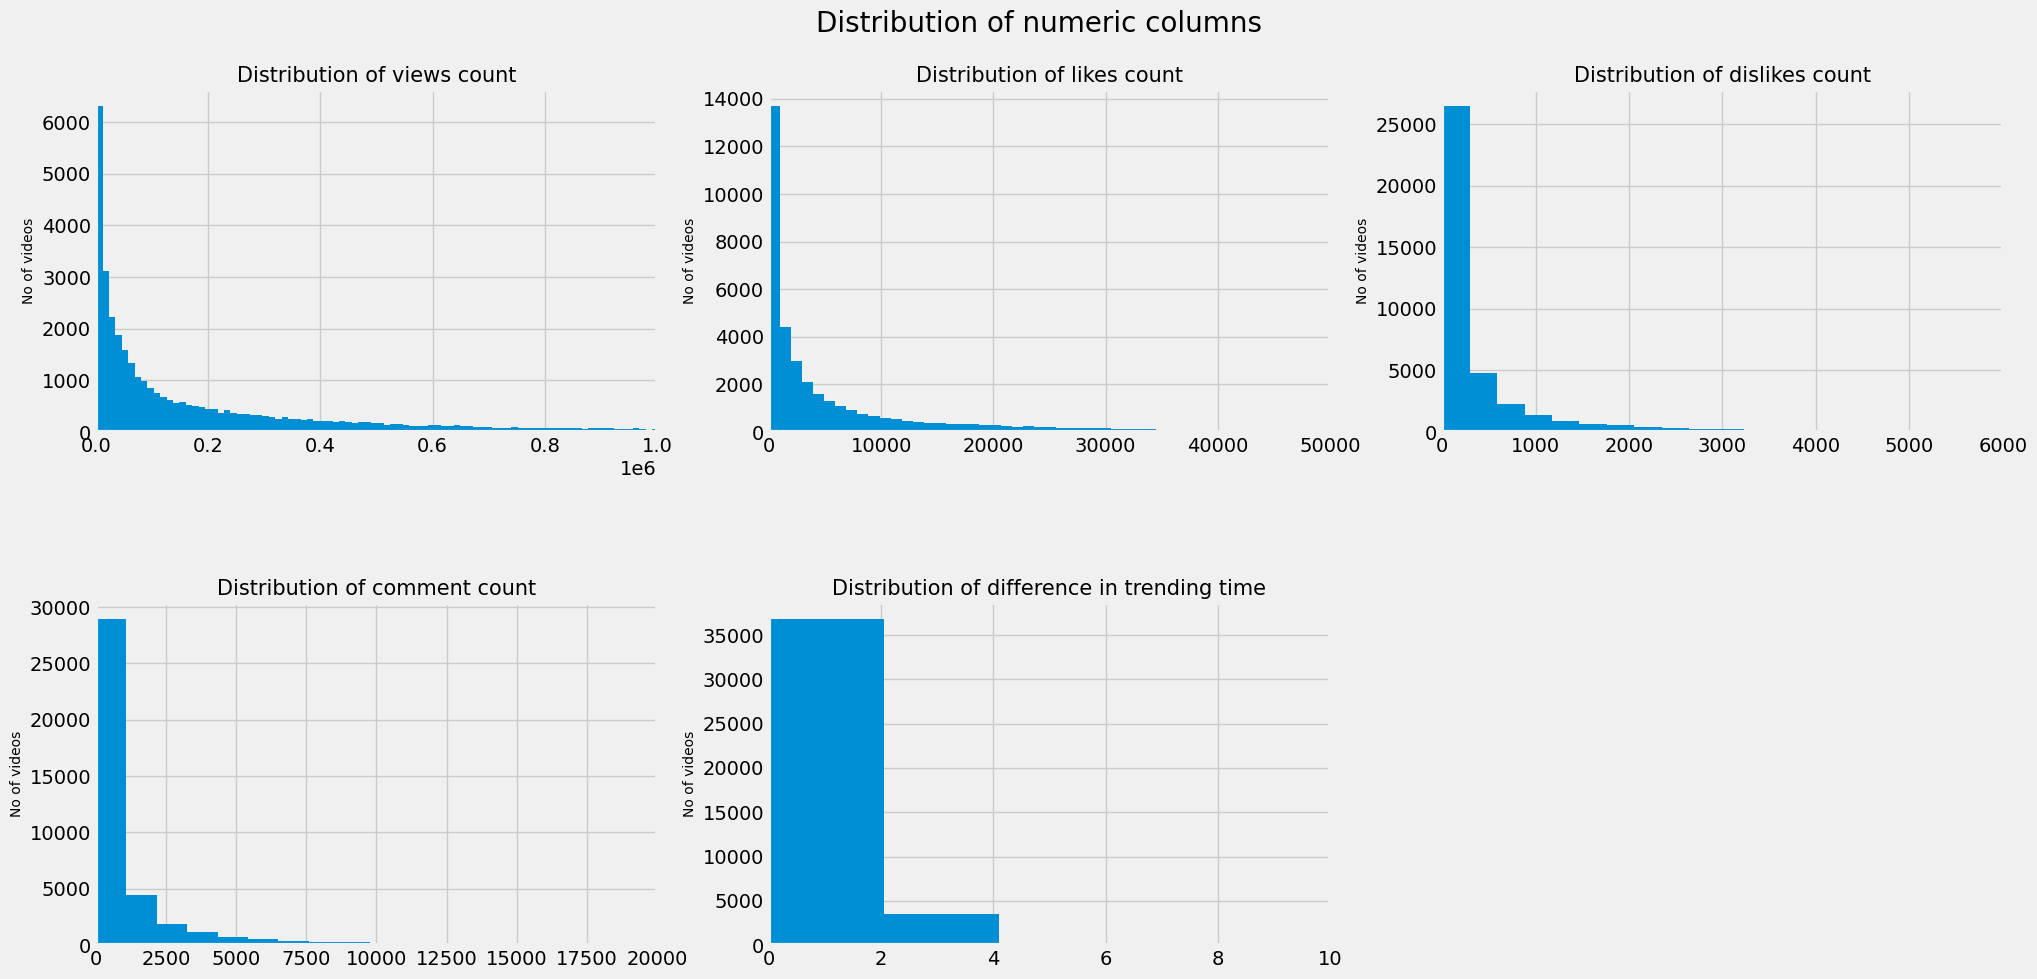

In [26]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['views'], bins=10000)  # creates histogram for number of views
ax[0][0].set_ylabel("No of videos", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,1000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['likes'], bins=5000)
ax[0][1].set_ylabel("No of videos", fontsize = 10)
ax[0][1].set_xlim(0,50000)
ax[0][1].set_title("Distribution of likes count", fontsize = 15);

ax[0][2].hist(x=df['dislikes'], bins=5000)
ax[0][2].set_ylabel("No of videos", fontsize = 10)
ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Distribution of dislikes count", fontsize = 15);

ax[1][0].hist(x=df['comment_count'], bins=1000)
ax[1][0].set_ylabel("No of videos", fontsize = 10)
ax[1][0].set_xlim(0,20000)
ax[1][0].set_title("Distribution of comment count", fontsize = 15);
                              
ax[1][1].hist(x=df['trending_days_difference'], bins=1000)
ax[1][1].set_ylabel("No of videos", fontsize = 10)
ax[1][1].set_xlim(0,10)
ax[1][1].set_title("Distribution of difference in trending time", fontsize = 15);

fig.delaxes(ax[1][2]);

We see, that we have right skewed distributions, meaning that the mean, median, and mode are all different from each other. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak). 

**We have made it through the data cleaning process!**  

The first step after browsing through our data confirming it is clean and logical, we now want to build some hypotheses in relation to our business case.  
The next task will be to look at the data columns in order to develop some hypotheses.  

In the following we will use the plotting library seaborn (abbreviated by sns). Seaborn is built on top of Matplotlib and extends its options. 

**1. Video-Categories differ in amount of trending videos, views, likes and dislikes**  
**2. For certain categories it takes longer to become a trending video after publication than for other categories**

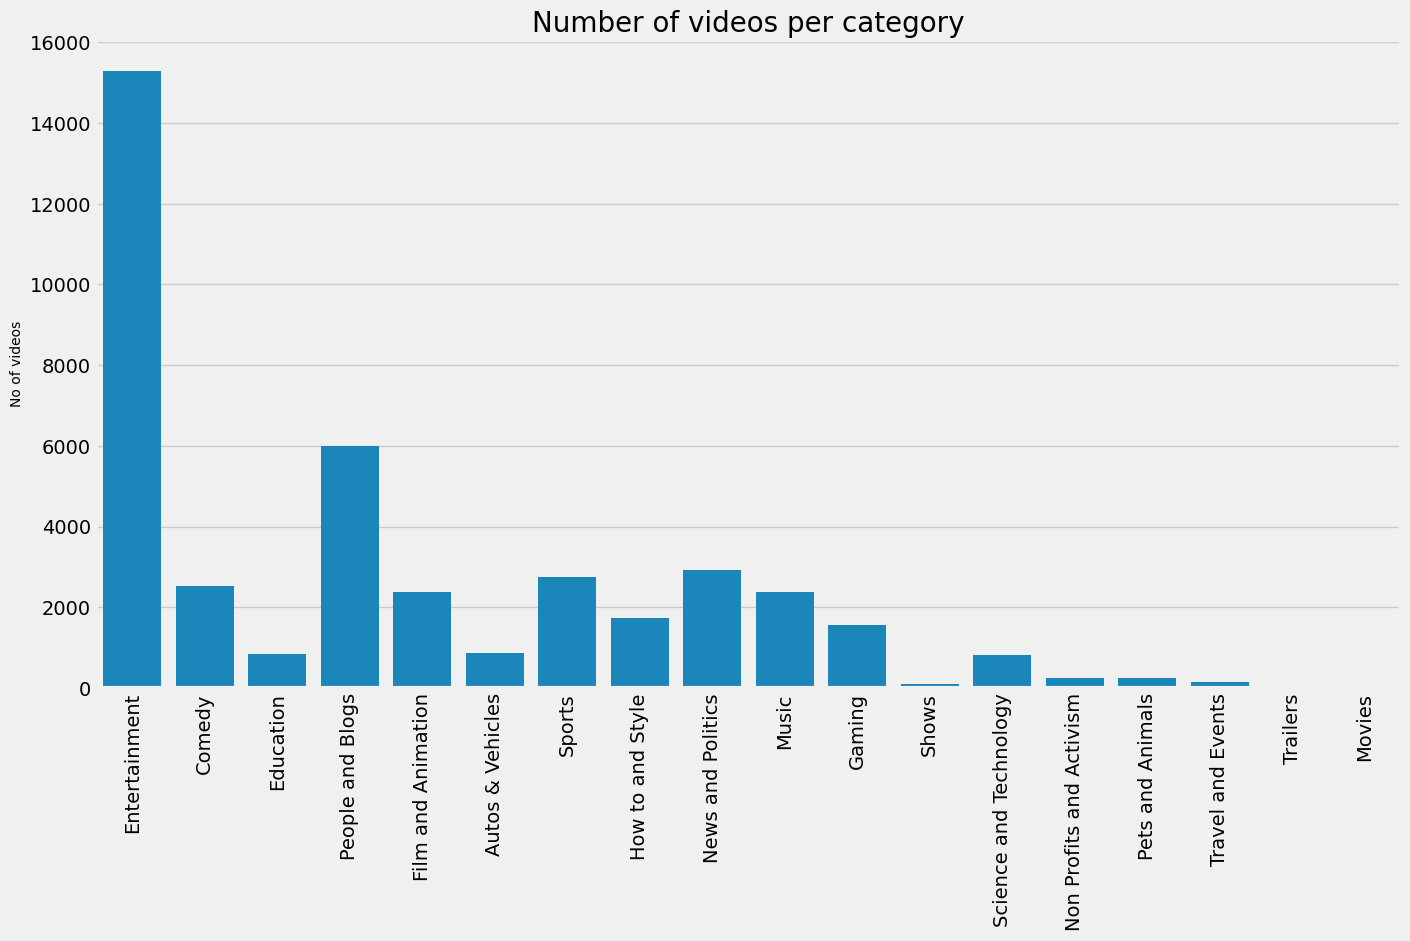

In [27]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

We can see, that most of the trending videos belong to the entertainment category. Music is more in the midfield when it comes to the amount of trending videos. The Categories will be represented by the same color in each of the following charts so note the categories we are primarily interested in.

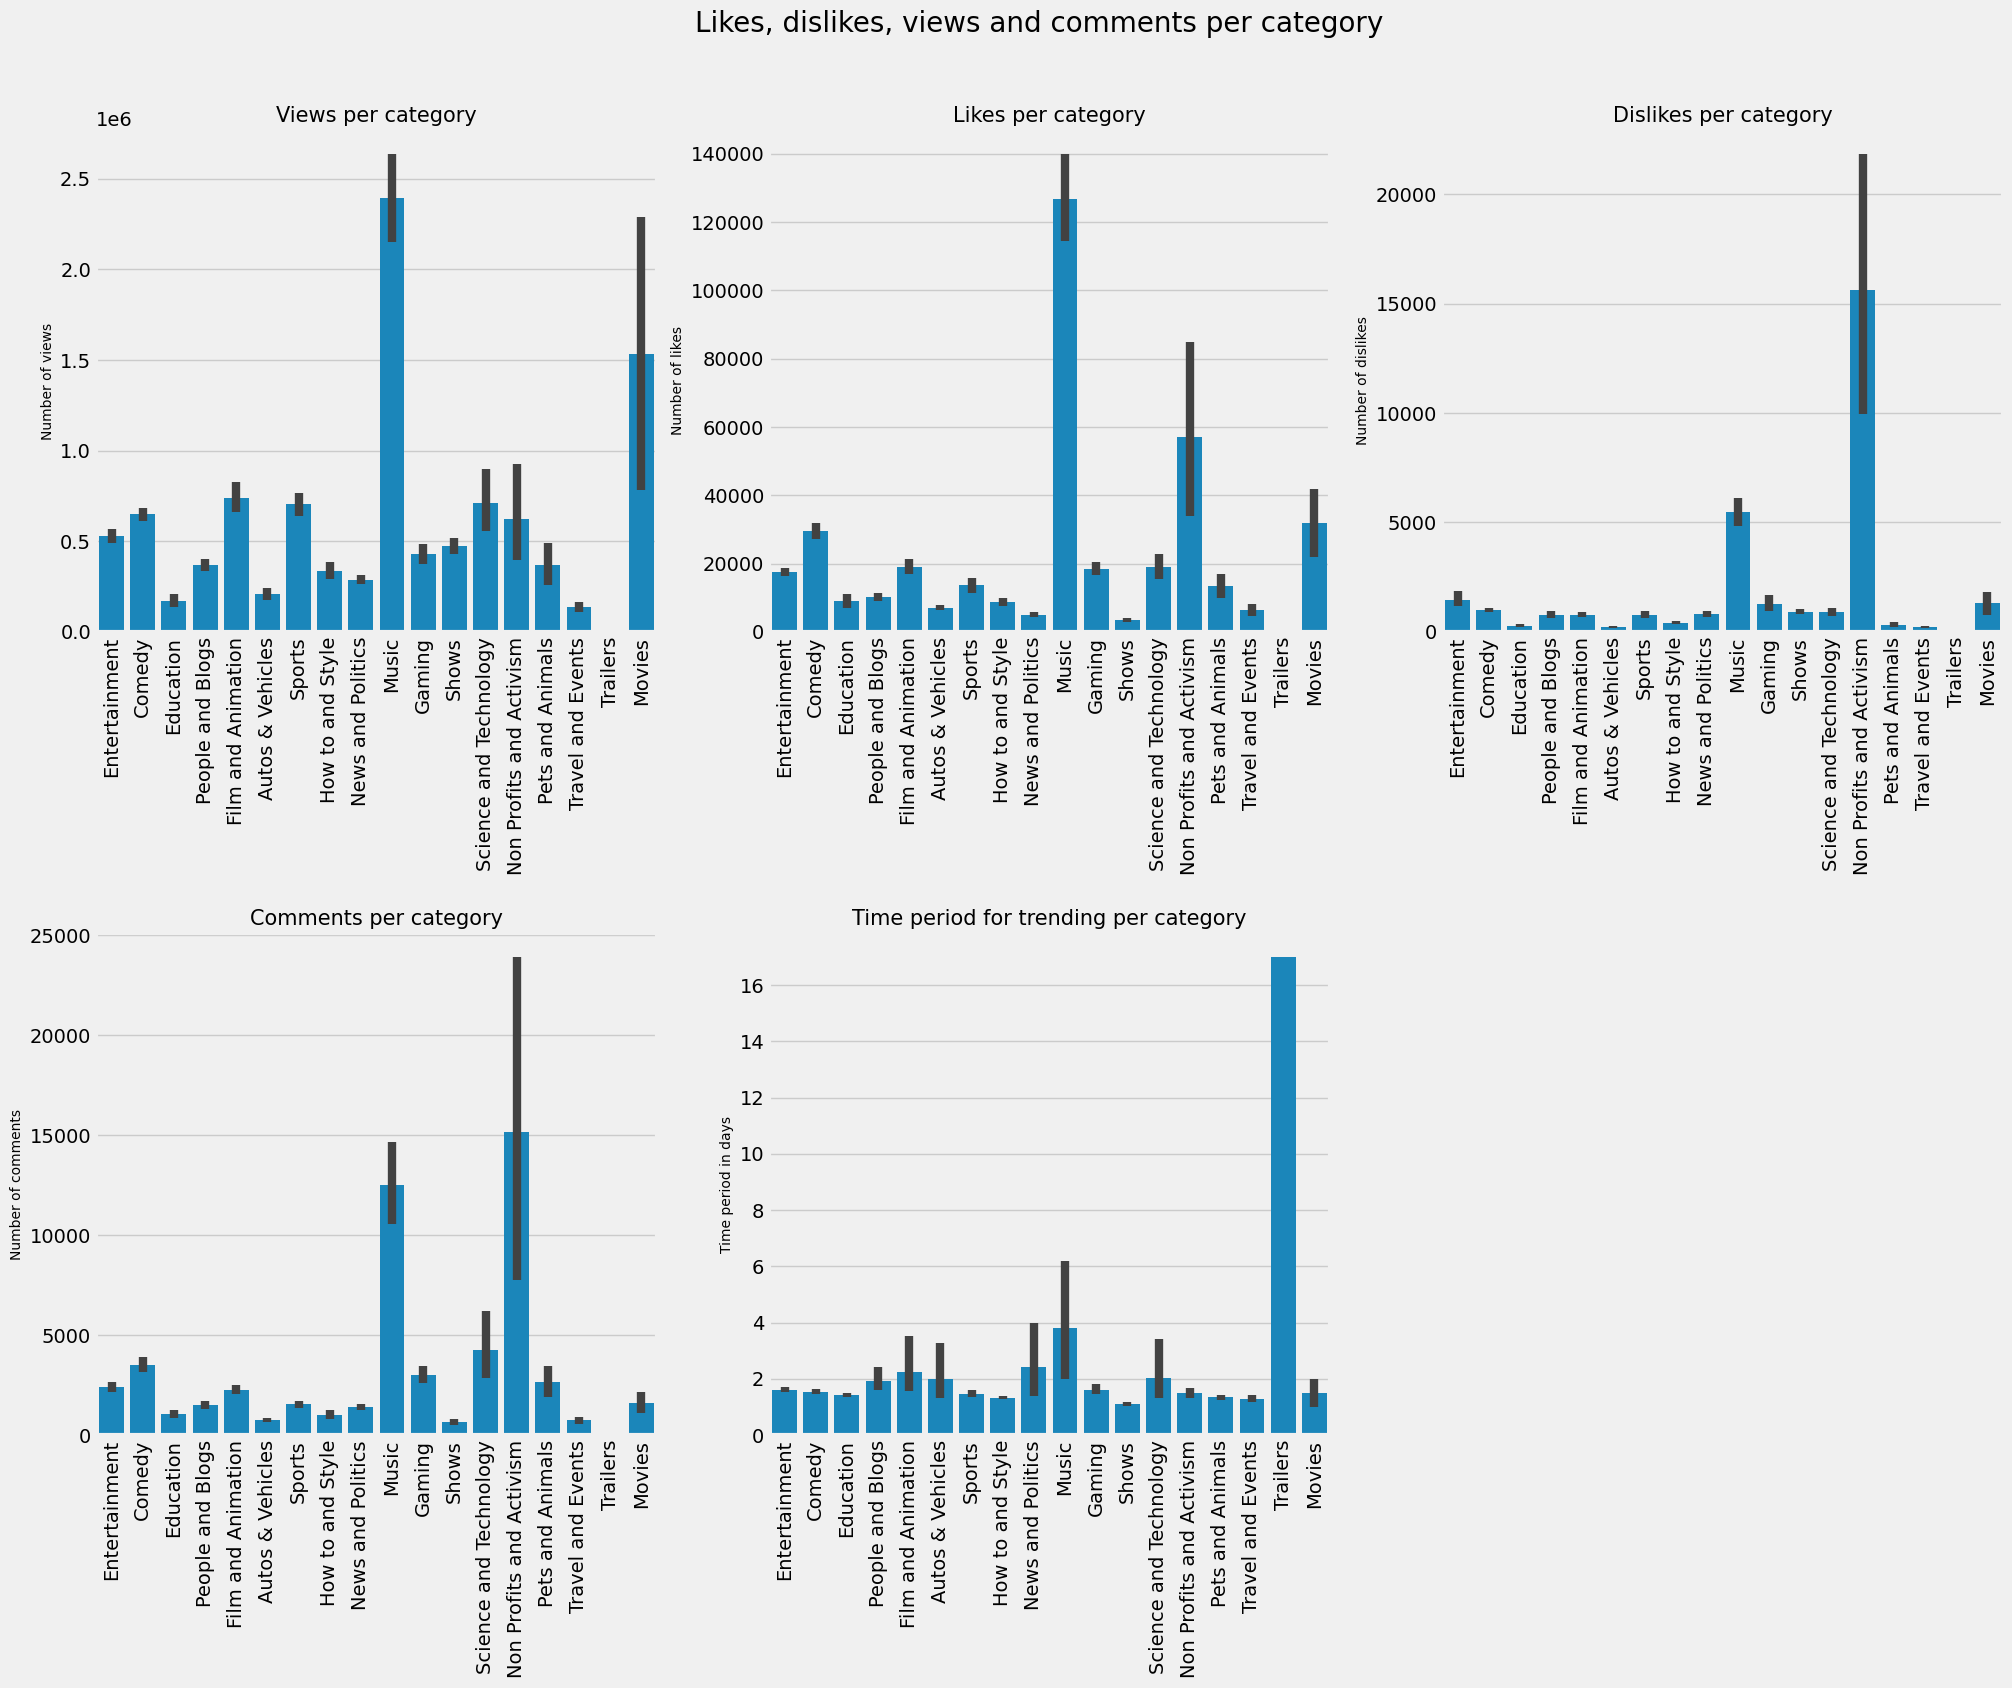

In [28]:
# Plot views, likes, dislikes and comments per category
fig, ax = plt.subplots(2,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle('Likes, dislikes, views and comments per category', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=df["category_name"], y = df['views'], ax=ax[0,0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("Number of views", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("Views per category", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=df["category_name"], y = df['likes'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Number of likes", fontsize = 10)
f2.set_title("Likes per category", fontsize = 15);

f3 = sns.barplot(x=df["category_name"], y = df['dislikes'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("Number of dislikes", fontsize = 10)
f3.set_title("Dislikes per category", fontsize = 15);

f4 = sns.barplot(x=df["category_name"], y = df['comment_count'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("Number of comments", fontsize = 10)
f4.set_title("Comments per category", fontsize = 15);

f5 = sns.barplot(x=df["category_name"], y = df['trending_days_difference'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("Time period in days", fontsize = 10)
f5.set_title("Time period for trending per category", fontsize = 15);

fig.delaxes(ax[1][2]);

Wow, music seems to be a promising category -  The videos belonging to this category have the most views, the most likes and the second most comments.  
It is surprising though that the category with the most trending videos (Entertainment) does not have the highest number of likes, views and comments.  

The time period for music videos to get trending is in comparison quite high - we should tell our agency to stay patient.

**3.Some YouTube channels are more successful than others**

In order to answer this hypothesis, we will have a look the YouTube channels which have published the most trending videos in the music category.

In [35]:
# Top5 channels across all categories
df['channel_title'].value_counts().head()

channel_title
Galileo           200
Ruhrpottwache     185
Анатолий Шарий    182
Çukur             180
Auf Streife       180
Name: count, dtype: int64

In [30]:
# Top5 channels for category music
df.query("category_name == 'Music'")['channel_title'].value_counts().head()

channel_title
385idéal       45
MrRevillz      33
Kontra K       29
Deutsch Rap    29
netd müzik     28
Name: count, dtype: int64

385idéal seems to publish most trending videos. We should do some research on this channel and recommend it to our colleagues.

**4. The amount of video publications differ per day and hour**

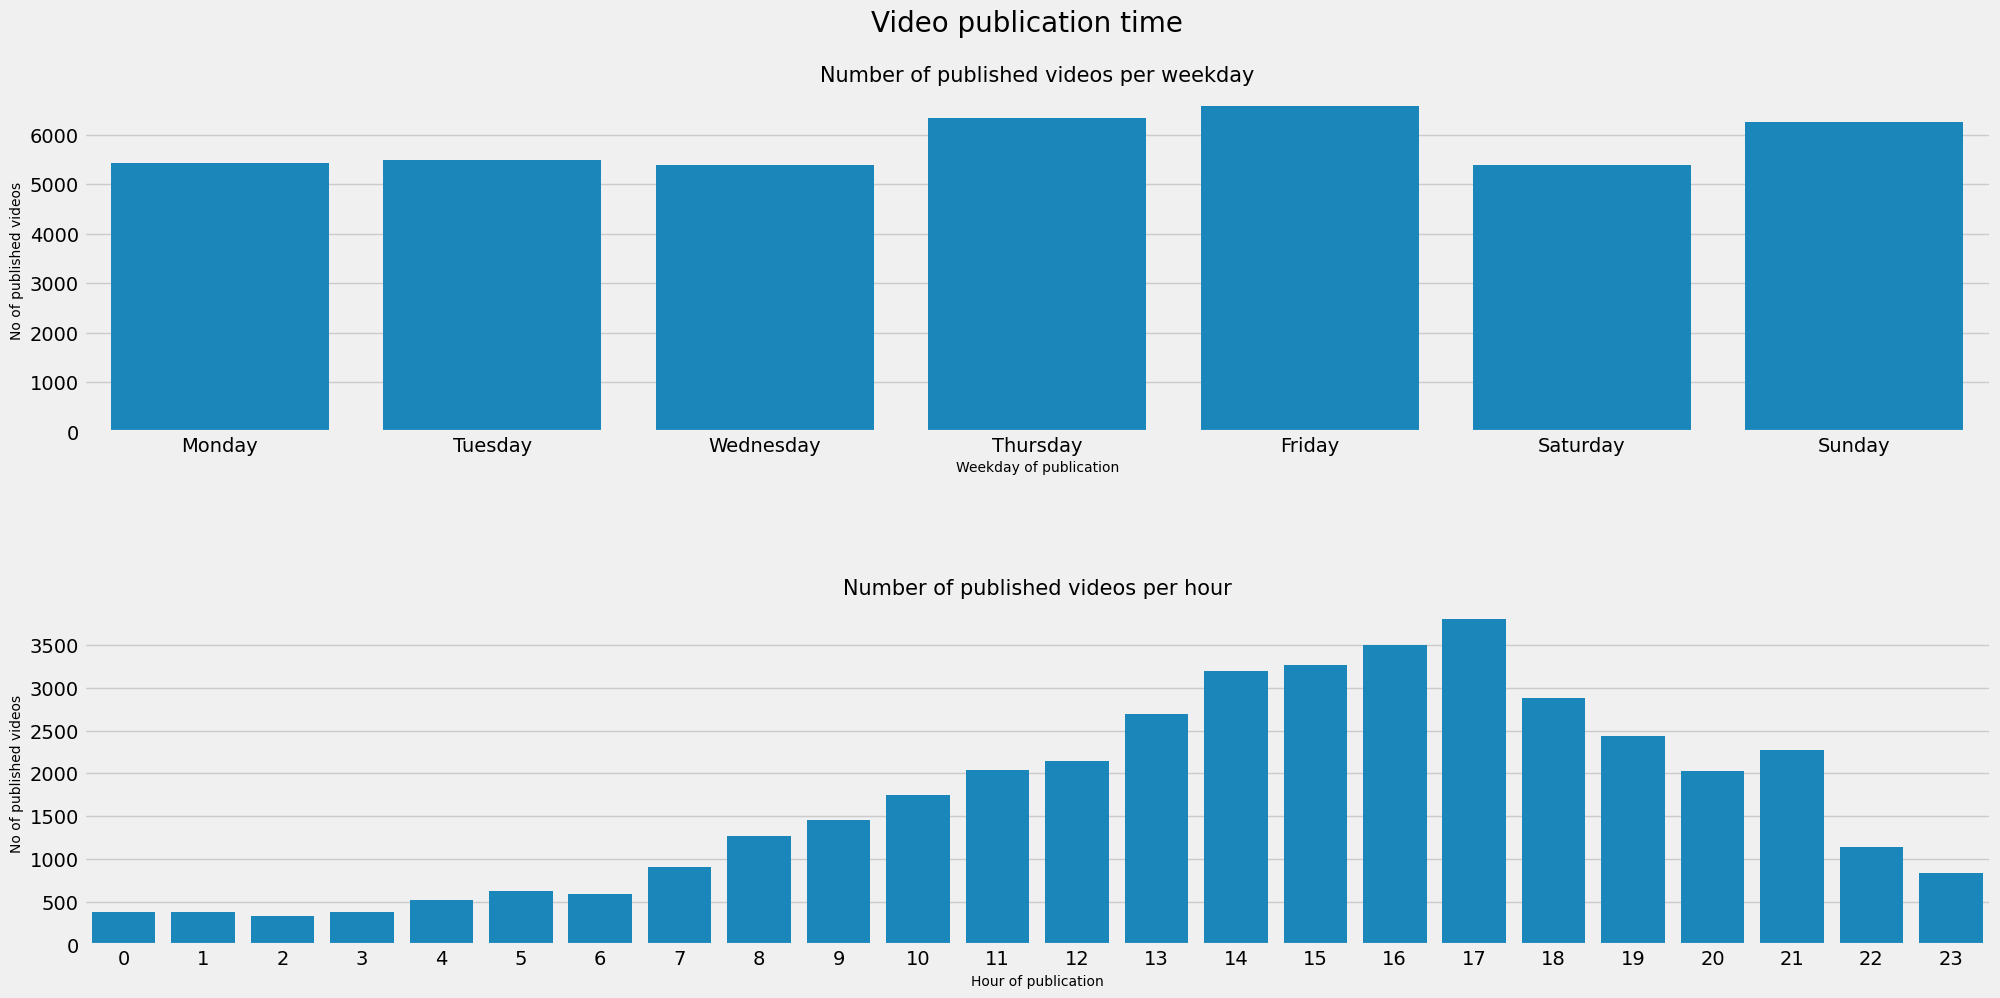

In [31]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

On fridays most trending videos got published - looking at the exact time of the day, 5pm is the time, when most trending videos got published.  
Let's do the same analysis only for the music category. 

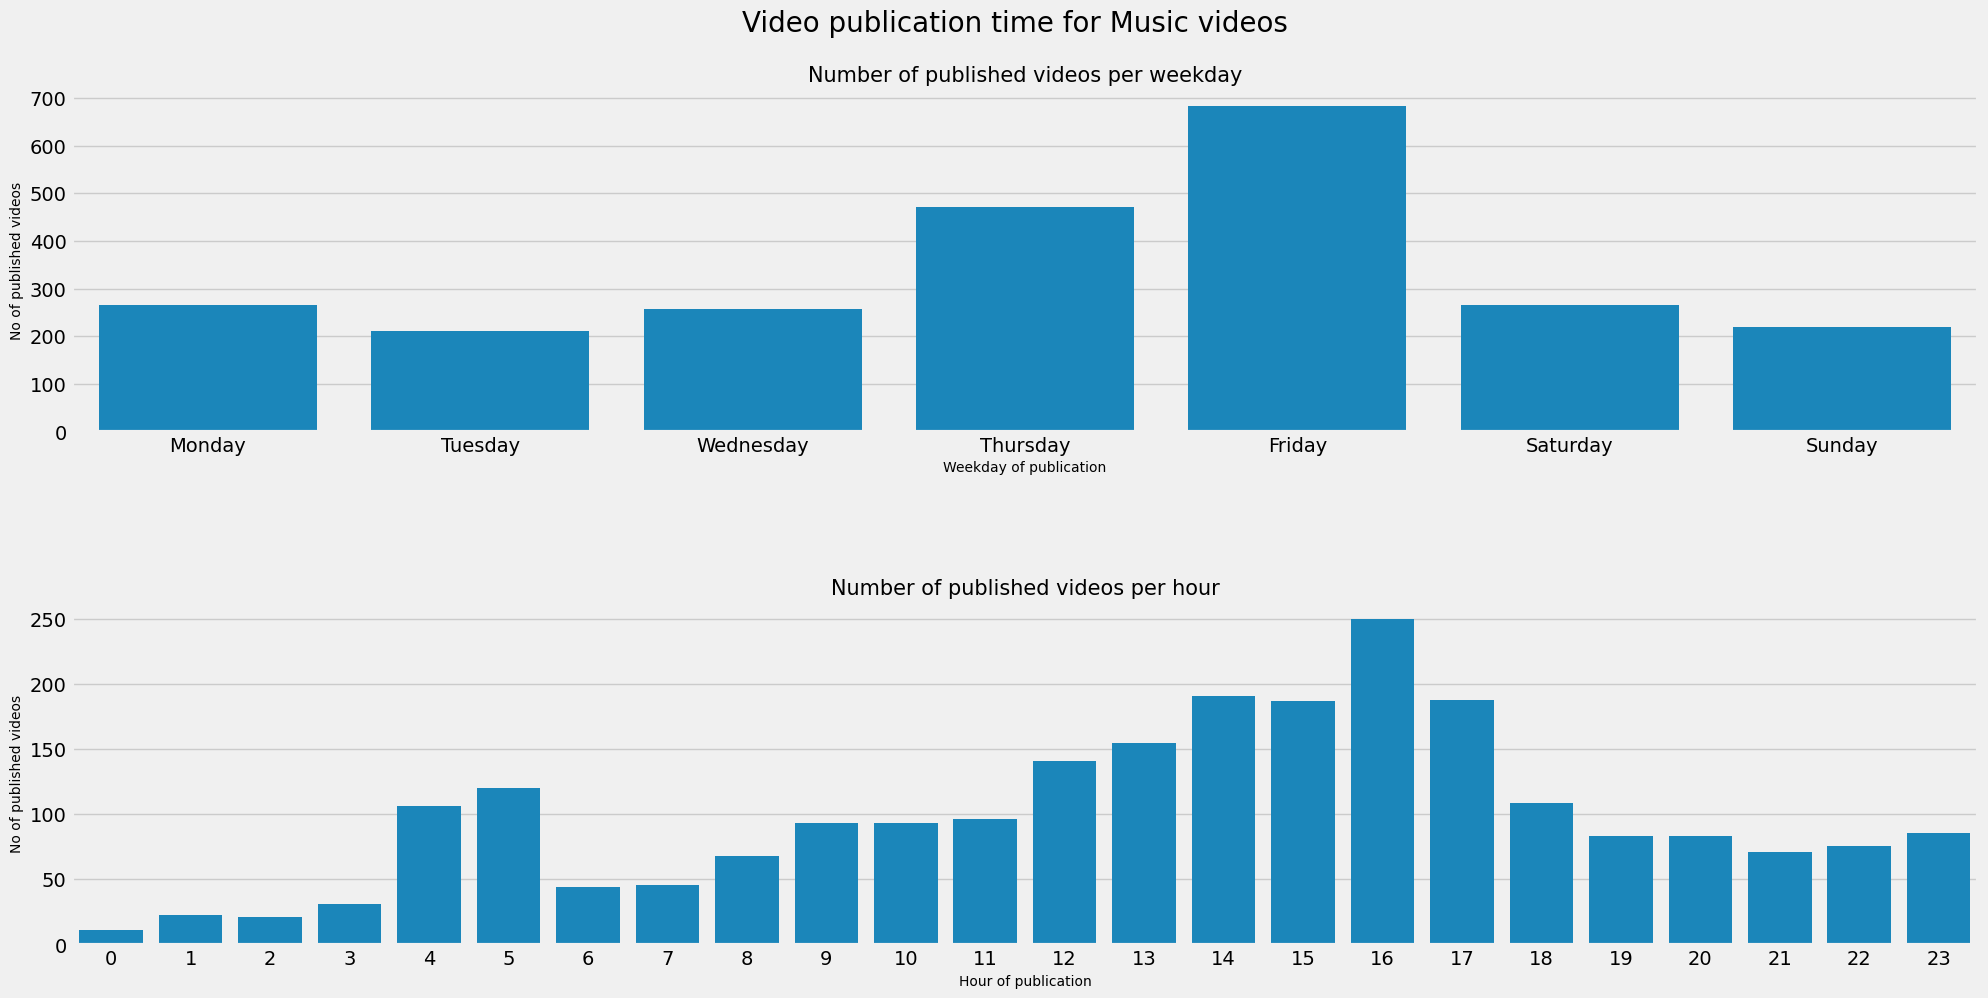

In [32]:
df_music = df.query("category_name == 'Music'")

fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time for Music videos', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df_music['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df_music['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

Friday seems to be THE day to publish the videos of our stars! 

## Check for correlations

**5. Correlations exist between views, likes, dislikes and comments**  
**6. The the length of time-interval between the date a video gets published and a video becomes trending also is correlated to number of views, likes, dislikes and comments**

In [33]:
# correlation matrix between these variables
corr_columns=["views", "likes", "dislikes", "comment_count", "trending_days_difference"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,views,likes,dislikes,comment_count,trending_days_difference
views,1.00,0.82,0.56,0.71,0.01
likes,0.82,1.00,0.46,0.85,0.00
dislikes,0.56,0.46,1.00,0.64,0.00
comment_count,0.71,0.85,0.64,1.00,0.00
trending_days_difference,0.01,0.00,0.00,0.00,1.00


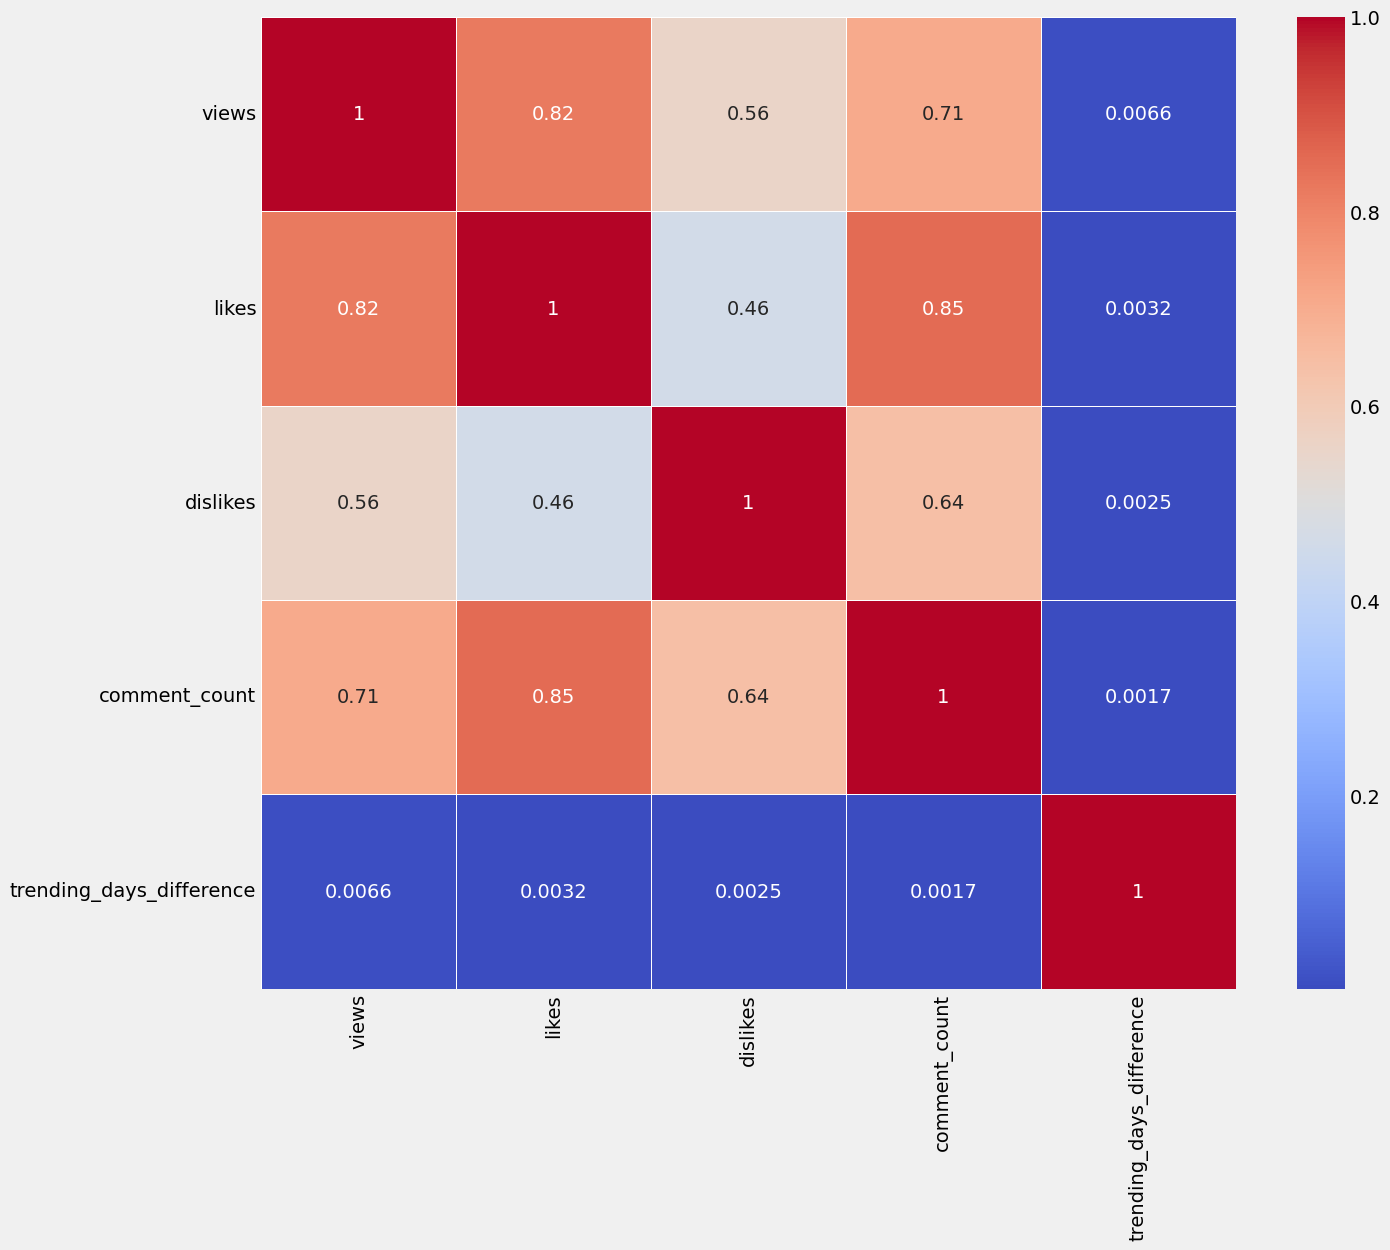

In [34]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

So there are notable positive relationships between
- Views and: Likes and Comments 
- Likes and: Comments
- Dislikes and Comments

There are no relationships between these variables and the time period between publish date and trending date.

### Task

1. Summarize the major issues and actions that needed to be addressed in cleaning and augmenting part. Could the decisions we took about cleaning affect the end understanding of the business case?   
2. Summarize the findings of our EDA here. What will you tell your colleagues from the agency?   

